
* 신경망과 퍼셉트론 
* 데이터 정규화
* 보스턴의 주택 가격을 예측하기 위한 딥러닝 네트워크 



## 텐서플로우 불러오기 및 버전확인

In [1]:
import tensorflow as tf
print(tf.__version__) 

2.2.0


## 텐서플로우에 탑재된 'boston_housing' 데이터 불러오기
- 신경망이 학습을 진행할 수 있도록 .load_data()를 활용한 학습데이터 및  테스트데이터 불러오기

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


## 각각의 데이터들에 대한 길이 및 일부 데이터 확인 
* len() : 값의 길이를 구하는 함수
* [0] : 첫번째 행에 접근

In [3]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


데이터 표준화

## 데이터 표준화 작업을 추가하자! 
- 현재 각 데이터의 단위가 다르다는 것을 확인.
(비율 / 0 or 1 / 양의 정수 등... )
- 데이터의 표준화 과정이란? 
  - 각 데이터에서 평균값을 뺀 다음 표준편차로 나눠주는 과정 
     -  데이터의 분포를 정규분포로 옮겨주는 과정
    
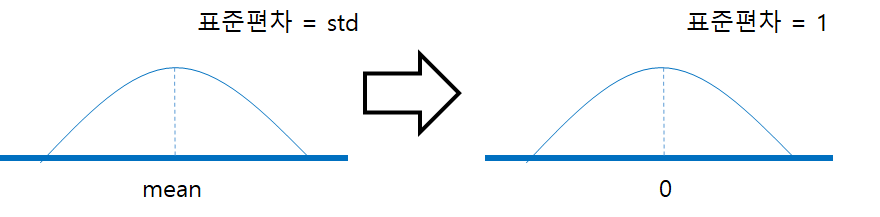

In [4]:
# 학습 데이터(train_x)와 테스트 데이터(test_x)의

#train_X에 대한 평균값 구하기
x_mean = train_X.mean()
#train_X에 대한 표준편차값 구하기
x_std = train_X.std()

#각 데이터에서 평균값 빼주기
train_X -= x_mean
#빼준 값에서 표준편차로 나눠주기
train_X /= x_std

#학습 데이터에서 구한 평균과 표준편차를 활용하여 테스트 데이터를 표준화
test_X -= x_mean
test_X /= x_std



# 학습 데이터(train_y)와 테스트 데이터(test_y)의 표준화 과정

#train_Y에 대한 평균값 구하기
y_mean = train_Y.mean() 
#train_Y에 대한 표준편차값 구하기
y_std = train_Y.std()

#각 데이터에서 평균값 빼주기
train_Y -= y_mean
#빼준 값에서 표준편차로 나눠주기
train_Y /= y_std

#학습데이터에서 구한 평균과 표준편차를 활용하여 테스트 데이터를 표준화
test_Y -= y_mean
test_Y /= y_std

###### 데이터 전처리 작업결과 확인
 - 평균 0 / 표준편차 1

In [5]:
print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


###### 신경망 모델 구축
- 비선형 활성화 함수 : relu
  - 첫번째 은닉층 퍼셉트론 수 : 52  
  - 두번째 은닉층 퍼셉트론 수 : 39
  - 세번째 은닉층 퍼셉트론 수 : 26    
  - 네번째 은닉층 퍼셉트론 수 : 1  

※ 은닉층의 퍼셉트론은 점차 감소하는 추세로 구축하는 것이 보편적

※ 마지막 레이어는 Y값 1개만 예측하면 되기 때문에 퍼셉트론 수를 1로 설정


###### **활성화 함수_ReLU**
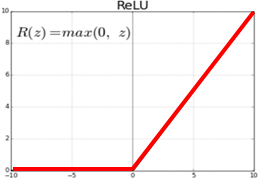

In [6]:
model = tf.keras.Sequential([
                             # 몇 개의 데이터가 들어올지 모르기 때문에 input_shape의 뒷 값을 빈칸으로 놔둠
                             tf.keras.layers.Dense(units= 52, activation='relu',input_shape = (13, )), 
                             tf.keras.layers.Dense(units= 39, activation='relu'),
                             tf.keras.layers.Dense(units= 26, activation='relu'),
                                tf.keras.layers.Dense(units= 1)
])

###### 모델 상세 정보 확인

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


###### 컴파일 단계
- tf.keras.optimizers.Adam() : 'SGD'와 함께 자주 쓰이는 최적화 함수. 
- 'Adam optimizer의 우수성'

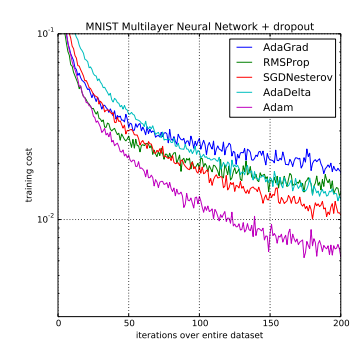

* 참고 논문 :https://arxiv.org/pdf/1412.6980.pdf*

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mse')

###### 모델 학습
- epochs : 25
- batch_size : 32
- vaildation_split : 0.25 (학습 데이터의 검증 데이터 비율 설정)

※ 미니배치 스텝수가 10인 이유 : '학습데이터의 25%'를 검증테이터로 활용했기 때문.  

In [9]:
#세대 
history = model.fit(train_X, train_Y,epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
10/10 [==============================] - 0s 28ms/step - loss: 0.8746 - val_loss: 1.0903
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7282 - val_loss: 1.0812
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6857 - val_loss: 1.0476
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6683 - val_loss: 1.0374
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6563 - val_loss: 1.0287
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6584 - val_loss: 1.0547
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 1.0384
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6449 - val_loss: 1.0150
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6212 - val_loss: 1.0479
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6220 - val_loss: 1.0030
Epoch 11/25
10/10 

###### 학습결과 시각화
- 학습 데이터로 구한 손실과 검증 데이터의 손실결과 비교.
  - 정확하게 학습이 이뤄지지 않고 있음을 확인.

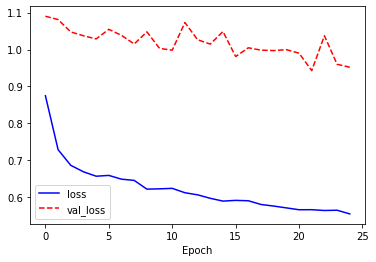

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show() # 차이가 크므로 과적합 의심

###### 테스트 데이터를 활용한 신경망 평가
- 높은 손실값을 도출.

In [11]:
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6224


0.6223942637443542

###### 테스트 데이터에 대한 예측값 도출 
 - model.predict() :입력 데이터를 넣으면 신경망의 출력 결과 도출 


In [12]:
pred_Y = model.predict(test_X)

###### 실제값과 예측값에 대한 결과 시각화

- plt.figure(figsize=(n_1,n_2)) : 출력결과에 대한 가로세로 크기 지정
- plt.plot(x,y) : x축과 y축에 대한 변수 설정
- plt.axis([x_min, x_max], [y_min,y_max]) : 각 x축과 y축에 대한 최소지점과 최대 지점 지정

※ 그래프를 가로지르는 대각선에 모든점이 위치해야 하지만 그렇지 못한 모습을
보여 주고 있다.

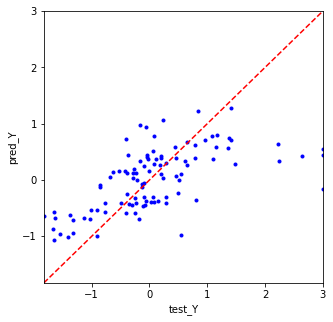

In [13]:
import matplotlib.pyplot as plt

#신경망 결과에 대한 시각화
plt.figure(figsize=(5,5)) 
plt.plot(test_Y, pred_Y,'b.')
plt.axis([min(test_Y),max(test_Y), min(test_Y),max(test_Y)])

#회귀선 시각화
plt.plot([min(test_Y),max(test_Y)], [min(test_Y), max(test_Y)],"r--")

#x축, y축 라벨명 설정 
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

#시각화
plt.show()

## 콜백(callback) 함수 - EarlyStopping() 
#### **왜 사용해야 하지?** 
###### 신경망이 훈련 데이터에 '과적합' 되지 않도록 학습 도중 끼어들어 학습을 조기 중단.

※ '과적합' : 생성된 모델이 학습 데이터와 지나치게 일치하여 새 데이터를 올바르게 예측하지 못하는 경우

- 콜백함수는 모델을 학습할 때 에폭이 끝날 때 마다 호출.
- patience : 몇 번의 에폭을 기준으로 할 것인지 설정.
- moniter : 어떠한 값을 모니터링 할 것인지 설정. 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dense(units=22, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.08), loss='mse')

history = model.fit(train_X, train_Y, epochs=100, batch_size = 32, validation_split = 0.25, 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 4 , monitor='val_loss')])

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 3.8040 - val_loss: 1.4905
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9673 - val_loss: 1.1965
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9476 - val_loss: 1.1874
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9049 - val_loss: 1.3579
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8038 - val_loss: 1.1495
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7311 - val_loss: 1.1266
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7162 - val_loss: 1.0622
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7408 - val_loss: 1.0257
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6638 - val_loss: 1.0229
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6664 - val_loss: 1.0907
Epoch 11

###### 학습 과정의 변화추이 시각화 
- 검증 데이터의 손실에서 뚜렷한 증가세가 보이지 않는다. 
- '과적합'의 가능성 

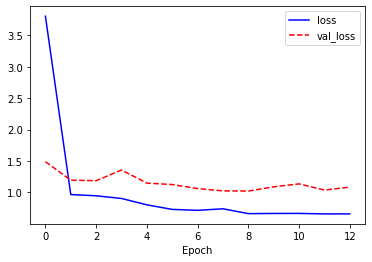

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

###### 신경망을 활용한 회귀모델 평가

In [16]:
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6736


0.6735760569572449

###### 예측결과 시각화

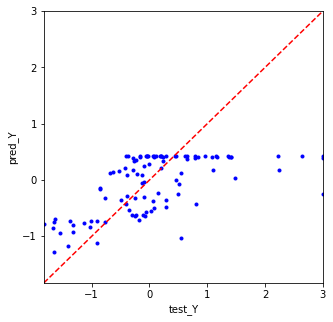

In [17]:
import matplotlib.pyplot as plt

#신경망을 활용한 test_X에 대한 '예측'
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y,'b.')
plt.axis([min(test_Y),max(test_Y), min(test_Y),max(test_Y)])

plt.plot([min(test_Y),max(test_Y)], [min(test_Y), max(test_Y)],"r--")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

###### 예측결과 확인

In [18]:
print(pred_Y[0:4])

[[-1.2809052 ]
 [-0.27983144]
 [ 0.42234597]
 [-0.25037566]]
